In [1]:
from hydpy import HydPy
hp = HydPy("Example1")

# Tutorial 1

## Step 1: Define Elements

We define an element with the unique id 'element1' and an outlet 'outl1'

In [2]:
from hydpy import Node, Element
n1 = Node("outl1")
e1 = Element("element1",
        outlets=n1)
e1

Element("element1",
        outlets="outl1")

In [3]:
hp.elements = e1
hp.elements

Elements("element1")

In [4]:
hp.nodes = n1
hp.nodes

Nodes("outl1")

Now we can already access the different properties of the element:

In [5]:
e1.name

'element1'

In [6]:
e1.outlets

Nodes("outl1")

The object e1 (of type Element) has more attributes:

In [7]:
dir(e1)

['_Device__check_name',
 '_Element__connections',
 '_Element__update_group',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_del_keywords',
 '_get_inlets',
 '_get_inputs',
 '_get_keywords',
 '_get_outlets',
 '_get_outputs',
 '_get_receivers',
 '_get_senders',
 '_inlets',
 '_inputs',
 '_keywords',
 '_model',
 '_name',
 '_outlets',
 '_outputs',
 '_plot_series',
 '_query_iosequences',
 '_receivers',
 '_senders',
 '_set_inlets',
 '_set_inputs',
 '_set_keywords',
 '_set_outlets',
 '_set_outputs',
 '_set_receivers',
 '_set_senders',
 'assignrepr',
 'clear_all',
 'collective',
 'extract_new',
 'get_handlerclass',
 'init_model',
 'inlets'

We can try to access the model attribute (this is the model that is connected to the element):

In [8]:
e1.model

AttributeNotReady: The model object of element `element1` has been requested but not been prepared so far.

For people who don't program very often, error messages can sometimes cause panic attacks. However, error messages usually provide a good indication of what to do next. Here we can read: 'The model object of element `element1` has been requested but not been prepared so far.' This is right, we haven't assigned a model yet.

## Step 2: Assign a model to an element

In [9]:
from hydpy import pub
pub.timegrids = "01.01.2000", "05.01.2000", "1h"

If working interactively in the python shell, a convenient way to assign a model to an element is to do a wildcard import from the model module and to call the method parameterstep directly after (in this case with a parameter time step of one day).

In [10]:
from hydpy.models.hland_96 import *
parameterstep("1d")

The method 'parameterstep' does some "magic" that might be a little bit confusing, that's why it is important to know what is happening here: it will create some useful objects in the namespace.

it will create an instance of the respective model class (variable 'model')

In [11]:
model

In [12]:
model.name

'hland_96'

In [13]:
from hydpy import Node, Element
e1 = Element("element1",
        outlets=Node("outl1"))
e1.model = model
e1.model.name

'hland_96'

## Step 3: Set model parameters

In [14]:
e1.model.parameters.control

area(?)
nmbzones(?)
sclass(?)
zonetype(?)
zonearea(?)
psi(?)
zonez(?)
pcorr(?)
pcalt(?)
rfcf(?)
sfcf(?)
tcorr(?)
tcalt(?)
icmax(?)
sfdist(?)
smax(?)
sred(?)
tt(?)
ttint(?)
dttm(?)
cfmax(?)
cfvar(?)
gmelt(?)
gvar(?)
cfr(?)
whc(?)
fc(?)
beta(?)
percmax(?)
cflux(?)
resparea(?)
recstep(?)
alpha(?)
k(?)
k4(?)
gamma(?)

In [15]:
nmbzones(1)
sclass(1)
area(1.0)
zonearea(1.0)
zonez(1.0)

In [16]:
e1.model.parameters.control

area(1.0)
nmbzones(1)
sclass(1)
zonetype(?)
zonearea(1.0)
psi(?)
zonez(1.0)
pcorr(?)
pcalt(?)
rfcf(?)
sfcf(?)
tcorr(?)
tcalt(?)
icmax(?)
sfdist(?)
smax(?)
sred(?)
tt(?)
ttint(?)
dttm(?)
cfmax(?)
cfvar(?)
gmelt(?)
gvar(?)
cfr(?)
whc(?)
fc(?)
beta(?)
percmax(?)
cflux(?)
resparea(?)
recstep(?)
alpha(?)
k(?)
k4(?)
gamma(?)

In [17]:
psi(1.0)
zonetype(FIELD)
pcorr(1.1)
pcalt(0.1)
rfcf(1.1)
sfcf(1.3)
tcorr(0.6)
tcalt(0.6)
icmax(2.0)
sfdist(1.0)
smax(inf)
sred(0.0)
tt(0.0)
ttint(2.0)
dttm(1.0)
cfmax(0.5)
cfvar(0.1)
gmelt(1.0)
gvar(0.2)
cfr(0.1)
whc(0.4)
fc(200.0)
beta(2.0)
percmax(0.5)
cflux(0.1)
alpha(2.0)
k(0.001)
k4(0.005)
gamma(0.0)
resparea(True)
recstep(100)

In [19]:
with e1.model.add_aetmodel_v1("evap_aet_hbv96"):
    temperaturethresholdice(0.0)
    soilmoisturelimit(0.8)
    excessreduction(0.5)
    with model.add_petmodel_v1("evap_pet_hbv96"):
        evapotranspirationfactor(0.7)
        airtemperaturefactor(0.1)
        altitudefactor(-0.1)
        precipitationfactor(0.1)

In [55]:
for name, model in e1.model.find_submodels(include_mainmodel=True).items():
    print(model.parameters.control)

area(1.0)
nmbzones(1)
sclass(1)
zonetype(FIELD)
zonearea(1.0)
psi(1.0)
zonez(1.0)
pcorr(1.1)
pcalt(0.1)
rfcf(1.1)
sfcf(1.3)
tcorr(0.6)
tcalt(0.6)
icmax(2.0)
sfdist(1.0)
smax(inf)
sred(0.0)
tt(0.0)
ttint(2.0)
dttm(1.0)
cfmax(0.5)
cfvar(0.1)
gmelt(nan)
gvar(nan)
cfr(0.1)
whc(0.4)
fc(200.0)
beta(2.0)
percmax(0.5)
cflux(0.1)
resparea(False)
recstep(96.0)
alpha(2.0)
k(0.001)
k4(0.005)
gamma(0.0)
nmbhru(1)
water(False)
interception(True)
soil(True)
temperaturethresholdice(nan)
maxsoilwater(200.0)
soilmoisturelimit(0.8)
excessreduction(0.5)
nmbhru(1)
hruarea(1.0)
hrualtitude(100.0)
evapotranspirationfactor(0.7)
altitudefactor(-0.1)
precipitationfactor(0.1)
airtemperaturefactor(0.1)


In [20]:
e1.model.update_parameters()

In [21]:
e1.model.prepare_allseries()

In [22]:
e1.model.aetmodel.petmodel.prepare_allseries()

In [23]:
n1.prepare_allseries()

In [24]:
e1.model.sequences.inputs.p.series = (
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.2, 0.0, 0.0, 1.3, 5.6, 2.9, 2.9, 10.6, 0.1, 0.7, 3.0, 2.1, 10.4, 3.5, 3.4,
    1.2, 0.1, 0.0, 0.0, 0.4, 0.1, 3.6, 5.9, 1.1, 20.7, 37.9, 8.2, 3.6, 7.5, 18.5,
    15.4, 6.3, 1.9, 4.9, 2.7, 0.5, 0.2, 0.5, 2.4, 0.4, 0.2, 0.0, 0.0, 0.3, 2.6,
    0.7, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    1.3, 0.0, 0.0, 0.0, 0.7, 0.4, 0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [25]:
e1.model.sequences.inputs.t.series = (
    21.2, 19.4, 18.9, 18.3, 18.9, 22.5, 25.1, 28.3, 27.8, 31.4, 32.2, 35.2, 37.1,
    31.2, 24.3, 25.4, 25.9, 23.7, 21.6, 21.2, 20.4, 19.8, 19.6, 19.2, 19.2, 19.2,
    18.9, 18.7, 18.5, 18.3, 18.5, 18.8, 18.8, 19.0, 19.2, 19.3, 19.0, 18.8, 18.7,
    17.8, 17.4, 17.3, 16.8, 16.5, 16.3, 16.2, 15.5, 14.6, 14.7, 14.6, 14.1, 14.3,
    14.9, 15.7, 16.0, 16.7, 17.1, 16.2, 15.9, 16.3, 16.3, 16.4, 16.5, 18.4, 18.3,
    18.1, 16.7, 15.2, 13.4, 12.4, 11.6, 11.0, 10.5, 11.7, 11.9, 11.2, 11.1, 11.9,
    12.2, 11.8, 11.4, 11.6, 13.0, 17.1, 18.2, 22.4, 21.4, 21.8, 22.2, 20.1, 17.8,
    15.2, 14.5, 12.4, 11.7, 11.9)

In [26]:
petinputs = e1.model.aetmodel.petmodel.sequences.inputs
petinputs.normalairtemperature.series = inputs.t.series - 1.0
petinputs.normalevapotranspiration.series = (
    0.100707, 0.097801, 0.096981, 0.09599, 0.096981, 0.102761, 0.291908, 1.932875,
    4.369536, 7.317556, 8.264362, 9.369867, 5.126178, 6.62503, 7.397619, 2.39151,
    1.829834, 1.136569, 0.750986, 0.223895, 0.099425, 0.098454, 0.098128, 0.097474,
    0.097474, 0.097474, 0.096981, 0.096652, 0.096321, 0.09599, 0.187298, 1.264612,
    3.045538, 1.930758, 2.461001, 6.215945, 3.374783, 8.821555, 4.046025, 2.110757,
    2.239257, 2.877848, 1.591452, 0.291604, 0.092622, 0.092451, 0.091248, 0.089683,
    0.089858, 0.089683, 0.088805, 0.089157, 0.090207, 0.091593, 0.154861, 0.470369,
    1.173726, 4.202296, 4.359715, 5.305753, 5.376027, 4.658915, 7.789594, 4.851567,
    5.30692, 3.286036, 1.506216, 0.274762, 0.087565, 0.085771, 0.084317, 0.083215,
    0.082289, 0.0845, 0.084864, 0.083584, 0.0834, 0.084864, 0.310229, 1.391958,
    3.195876, 5.191651, 7.155036, 8.391432, 8.391286, 10.715238, 9.383394, 7.861915,
    6.298329, 2.948416, 1.309232, 0.32955, 0.089508, 0.085771, 0.0845, 0.084864)

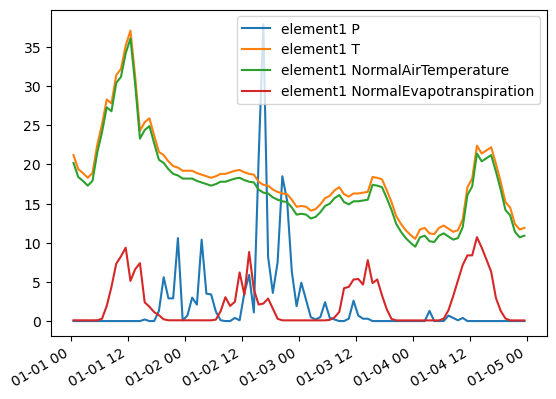

In [36]:
figure = e1.plot_inputseries()

In [27]:
e1.model.sequences.states.ic(0.0)
e1.model.sequences.states.sp(0.0)
e1.model.sequences.states.wc(0.0)
e1.model.sequences.states.sm(100.0)
e1.model.sequences.states.uz(0.0)
e1.model.sequences.states.lz(10.0)

In [28]:
e1.model.sequences.states

ic(0.0)
sp(0.0)
wc(0.0)
sm(100.0)
uz(0.0)
lz(10.0)

In [29]:
hp.simulate()

method HydPy.simulate started at 13:14:40
    |---------------------|
    ***********************
    seconds elapsed: 0.008028700016438961


In [32]:
n1.sequences.sim.simseries

InfoArray([5.78703704e-04, 5.78583140e-04, 5.78462602e-04, 5.78342089e-04,
           5.78221601e-04, 5.78101138e-04, 5.77980701e-04, 5.77860288e-04,
           5.77739901e-04, 5.77619538e-04, 5.77499201e-04, 5.77378888e-04,
           5.77258601e-04, 5.77138339e-04, 5.77018102e-04, 5.76897890e-04,
           5.76777703e-04, 5.76657540e-04, 5.76537404e-04, 1.32163732e-03,
           4.90632269e-03, 1.13248048e-02, 4.21971636e-02, 6.62682934e-02,
           5.94088174e-02, 6.65138409e-02, 7.94876776e-02, 1.34650543e-01,
           1.96859933e-01, 2.10867065e-01, 2.04433050e-01, 1.75214176e-01,
           1.52538463e-01, 1.31987789e-01, 1.11381801e-01, 1.07248677e-01,
           1.02931492e-01, 1.40045688e-01, 1.64716864e-01, 3.37564799e-01,
           1.11561229e+00, 1.67822263e+00, 1.39970545e+00, 1.28997062e+00,
           1.84797718e+00, 2.54911587e+00, 2.39934779e+00, 1.78314397e+00,
           1.48112946e+00, 1.29449989e+00, 1.02510560e+00, 7.92467277e-01,
           6.42663087e-01

In [33]:
e1.model.sequences.fluxes.qt.series

InfoArray([5.78703704e-04, 5.78583140e-04, 5.78462602e-04, 5.78342089e-04,
           5.78221601e-04, 5.78101138e-04, 5.77980701e-04, 5.77860288e-04,
           5.77739901e-04, 5.77619538e-04, 5.77499201e-04, 5.77378888e-04,
           5.77258601e-04, 5.77138339e-04, 5.77018102e-04, 5.76897890e-04,
           5.76777703e-04, 5.76657540e-04, 5.76537404e-04, 1.32163732e-03,
           4.90632269e-03, 1.13248048e-02, 4.21971636e-02, 6.62682934e-02,
           5.94088174e-02, 6.65138409e-02, 7.94876776e-02, 1.34650543e-01,
           1.96859933e-01, 2.10867065e-01, 2.04433050e-01, 1.75214176e-01,
           1.52538463e-01, 1.31987789e-01, 1.11381801e-01, 1.07248677e-01,
           1.02931492e-01, 1.40045688e-01, 1.64716864e-01, 3.37564799e-01,
           1.11561229e+00, 1.67822263e+00, 1.39970545e+00, 1.28997062e+00,
           1.84797718e+00, 2.54911587e+00, 2.39934779e+00, 1.78314397e+00,
           1.48112946e+00, 1.29449989e+00, 1.02510560e+00, 7.92467277e-01,
           6.42663087e-01

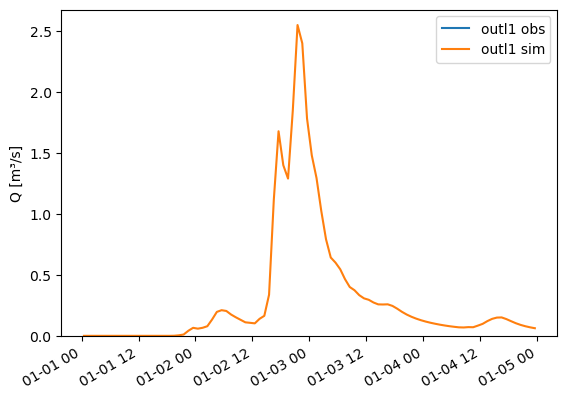

In [35]:
figure = n1.plot_allseries()